In [1]:
from dotenv import load_dotenv
import os
load_dotenv()

# print(os.getenv("CACHE_DIR"))

True

In [3]:
import kagglehub
import shutil

path = kagglehub.dataset_download("mathchi/diabetes-data-set")

dsFolder = "./datasets/diabetes"
dsFilename = "diabetes.csv"
dsPath = dsFolder + "/" + dsFilename

# Move the downloaded content to local folder
shutil.copytree(
    path,
    dsFolder,
    dirs_exist_ok=True
)

'./datasets/diabetes'

In [4]:
import pandas as pd
df = pd.read_csv(dsPath)

# df.head()
# df.shape


In [5]:
# df[df['Insulin'] == 0]

col = 'Insulin'
zero_count = (df[col] == 0).sum()

print(f"Number of zeros in '{col}': {zero_count}")
# i0.value_counts()

Number of zeros in 'Insulin': 374


In [30]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
# 768 registros
df.shape

(768, 9)

In [32]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
# 768 non-null, ou seja, o dataset está completo
df.info()

Outcome
0    500
1    268
Name: count, dtype: int64

In [33]:
# Verificar a coluna de classificação
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

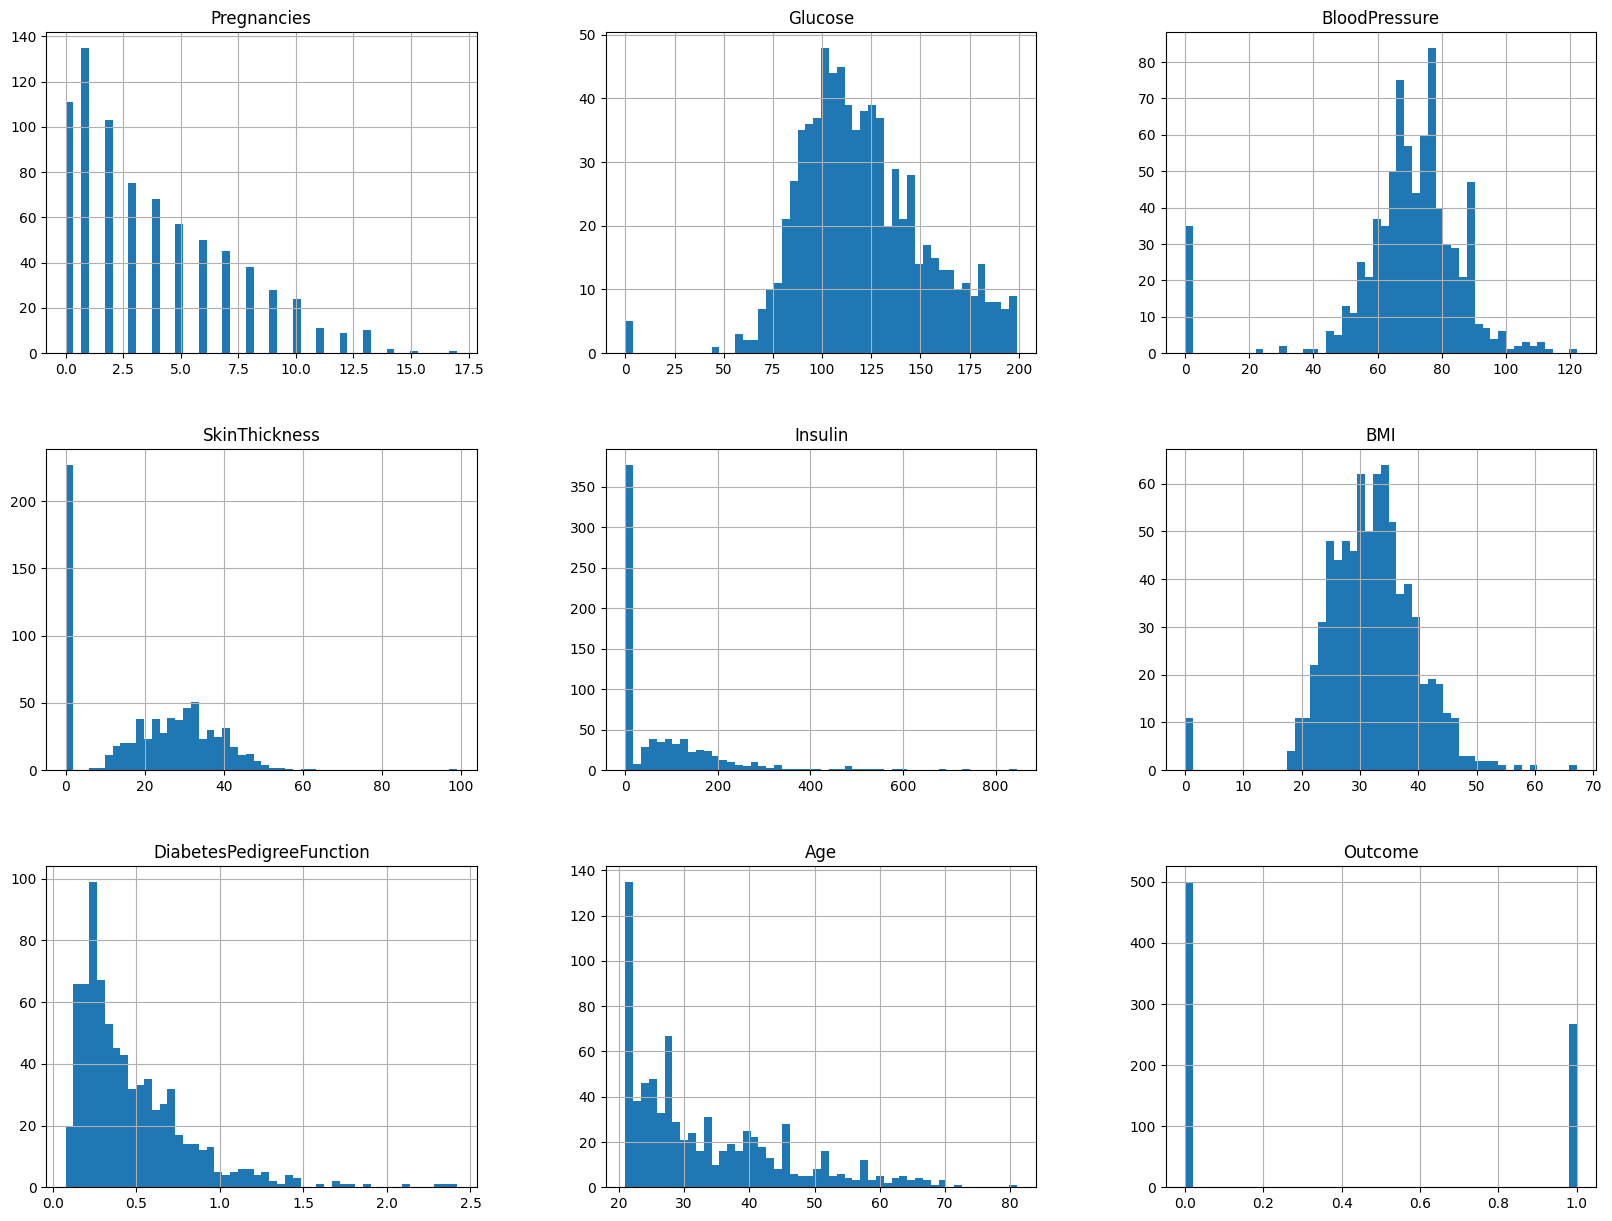

In [35]:
# Podemos nota outliers em todas as colunas, excet Pregnancies. Posteriormente precisamos avaliar se estes outliers impactam no modelo e precisam ser tratados
df.hist(bins=50, figsize=(20,15))

### Bases de TESTE e TREINO e suas PROPORÇÕES

In [36]:
from sklearn.model_selection import train_test_split

# random state = np.random.seed, para manter a aleatoriedade e não atrapalhar no treinamento

dfTrain, dfTest = train_test_split(df, test_size = 0.2, random_state = 7)

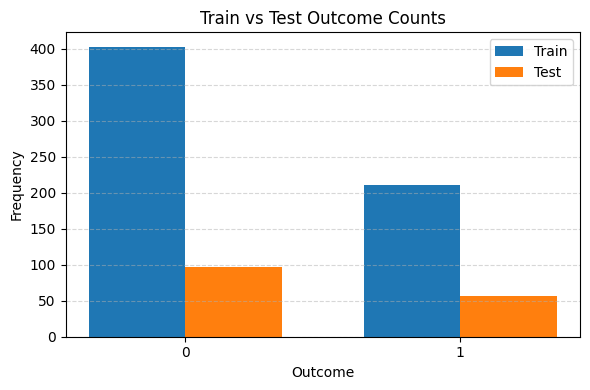

In [48]:
import matplotlib.pyplot as plt

# Count each outcome
train_counts = dfTrain["Outcome"].value_counts().sort_index()
test_counts = dfTest["Outcome"].value_counts().sort_index()

# Ensure same index order (0 and 1)
index = [0, 1]

# Bar width and positions
bar_width = 0.35
x = range(len(index))

# Plot
plt.figure(figsize=(6, 4))
plt.bar([i - bar_width/2 for i in x], train_counts[index], width=bar_width, label="Train")
plt.bar([i + bar_width/2 for i in x], test_counts[index], width=bar_width, label="Test")

plt.xticks(x, index)
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.title("Train vs Test Outcome Counts")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

# Podemos perceber que está bem distribuido a parte de OUTCOME
# Treino tem 400 = 0 e 100 = 1
# Teste tem 200 = 0 e 55 = 1

In [43]:
# Analisando as proporções em percentual
dfTest["Outcome"].value_counts() / len(dfTest)

Outcome
0    0.62987
1    0.37013
Name: count, dtype: float64

In [44]:
# Analisando as proporções
dfTrain["Outcome"].value_counts() / len(dfTrain)

Outcome
0    0.656352
1    0.343648
Name: count, dtype: float64

In [49]:
df["Outcome"].value_counts() / len(dfTrain)

# Porém, se comparado com o DF total, as porcentagens estão com uma diferença um pouco "preocupantes"
# de 65% para 81% = 0 e 34% para 43% = 1

Outcome
0    0.814332
1    0.436482
Name: count, dtype: float64

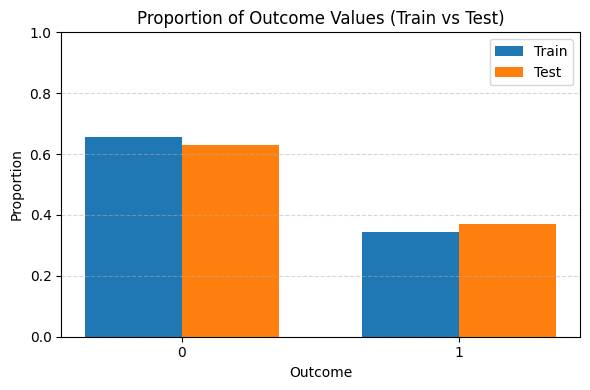

In [45]:
import matplotlib.pyplot as plt

# Calculate proportions
train_props = dfTrain["Outcome"].value_counts(normalize=True).sort_index()
test_props = dfTest["Outcome"].value_counts(normalize=True).sort_index()

# Ensure order
index = [0, 1]
bar_width = 0.35
x = range(len(index))

# Plot
plt.figure(figsize=(6, 4))
plt.bar([i - bar_width/2 for i in x], train_props[index], width=bar_width, label="Train")
plt.bar([i + bar_width/2 for i in x], test_props[index], width=bar_width, label="Test")

plt.xticks(x, index)
plt.xlabel("Outcome")
plt.ylabel("Proportion")
plt.title("Proportion of Outcome Values (Train vs Test)")
plt.legend()
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

<Axes: xlabel='Glucose', ylabel='Insulin'>

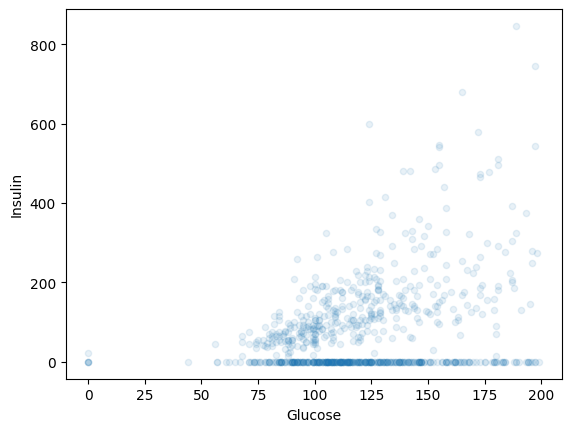

In [63]:
# df.columns
# 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
df.plot(
    kind="scatter",
    x="Glucose",
    y="Insulin",
    alpha=0.1
)

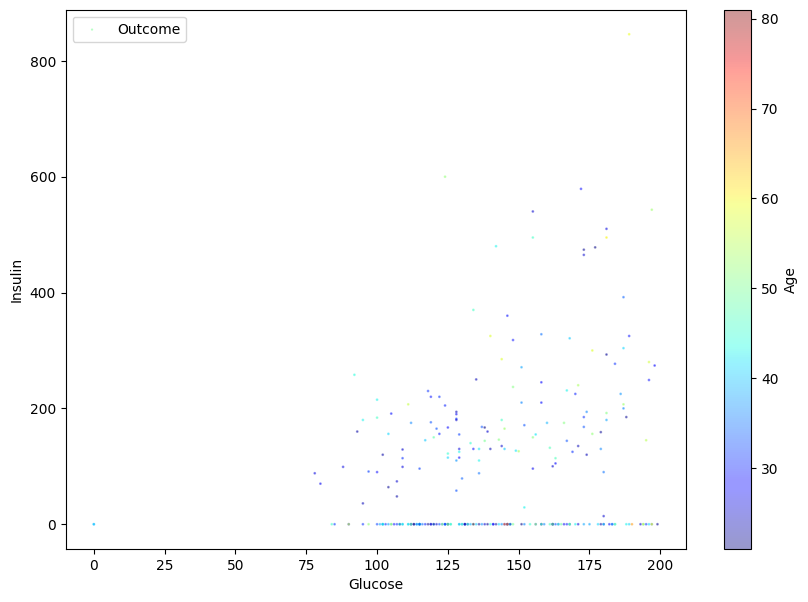

In [71]:
df.plot(
    kind="scatter",
    x="Glucose",
    y="Insulin",
    alpha=0.4,
    s=df["Outcome"],
    label="Outcome",
    figsize=(10,7),
    c="Age",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    sharex=False
)
plt.legend()

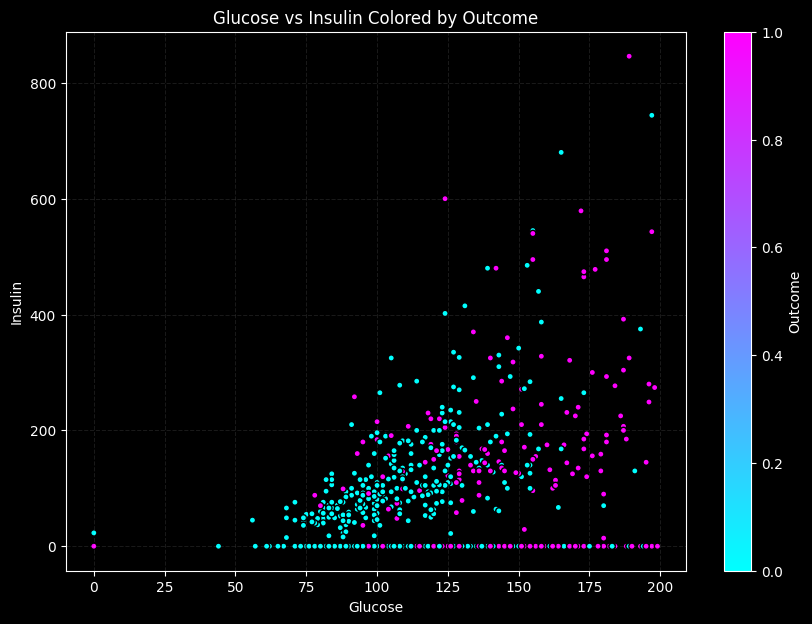

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
# plt.style.use("dark_background")

x = "Glucose"
y = "Insulin"

scatter = plt.scatter(
    df[x],
    df[y],
    c=df["Outcome"], # colored by
    cmap="cool",
    s=20, # circle size
    # alpha=0.5,
    edgecolor="k"        # Optional: add black border to make points visible
)

plt.xlabel(x)
plt.ylabel(y)
plt.title(f"{x} vs {y} Colored by Outcome")

cbar = plt.colorbar(scatter)
cbar.set_label('Outcome')

plt.grid(True, linestyle="--", alpha=0.1)
plt.show()

# Visualmente percebemos que glucose < 125 && insulina < 400 não tem diabetes. Porém insulin acima de 40 é diabético (1 unico outlier da glucose 125)

# glucose entre 125 e 150 é bem misto

# glucose acima de 150 tem mais diabéticos, mesmo com insuline baixa

In [95]:
def plotRelation(x, y):
    plt.figure(figsize=(10, 7))

    # x = "Glucose"
    # y = "Insulin"

    scatter = plt.scatter(
        df[x],
        df[y],
        c=df["Outcome"], # colored by
        cmap="cool",
        s=20, # circle size
        # alpha=0.5,
        edgecolor="k"        # Optional: add black border to make points visible
    )

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{x} vs {y} Colored by Outcome")

    cbar = plt.colorbar(scatter)
    cbar.set_label('Outcome')

    plt.grid(True, linestyle="--", alpha=0.1)
    plt.show()

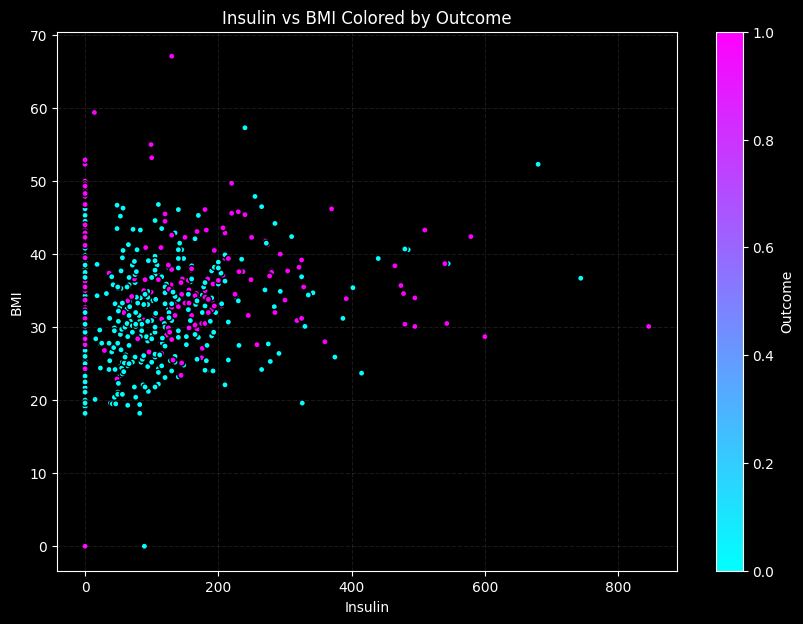

In [100]:
# plotRelation("Glucose", "Insulin")
# plotRelation("Glucose", "BMI")
# plotRelation("Glucose", "Age")
# plotRelation("Glucose", "SkinThickness")

plotRelation("Insulin", "BMI")

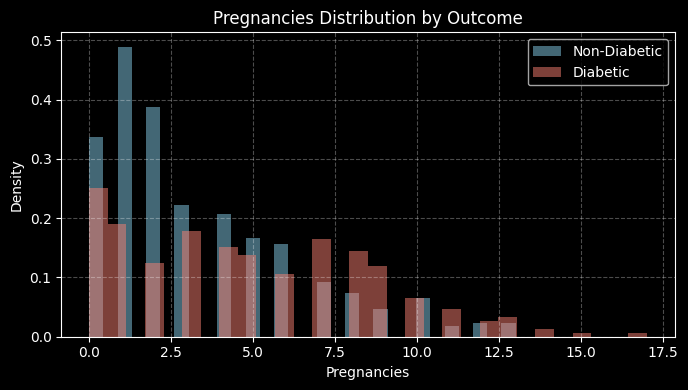

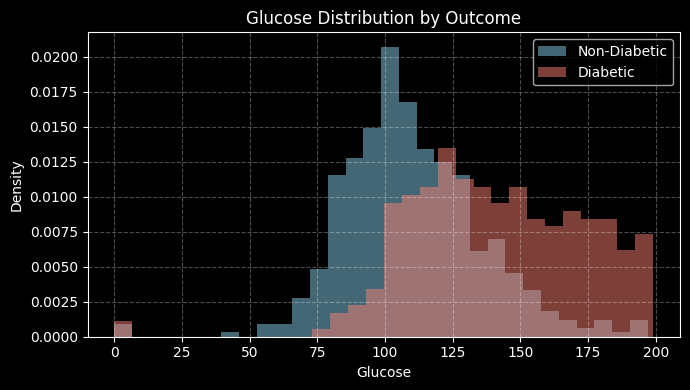

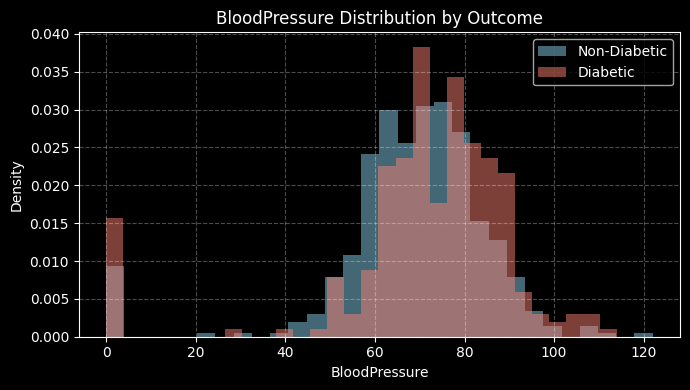

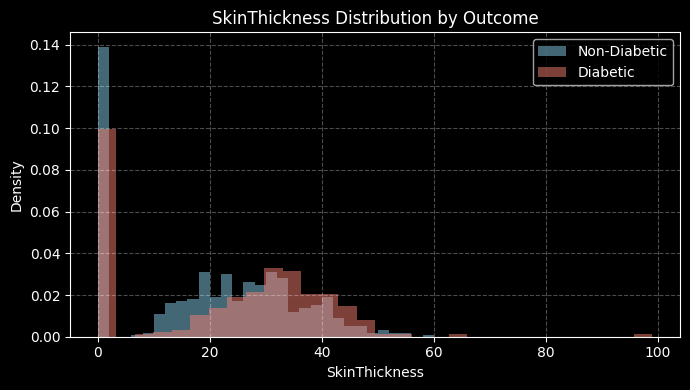

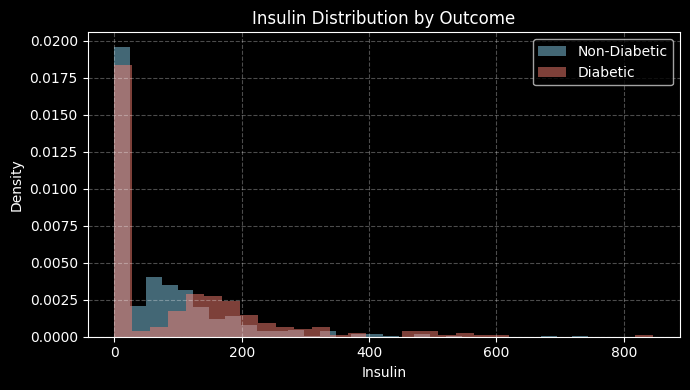

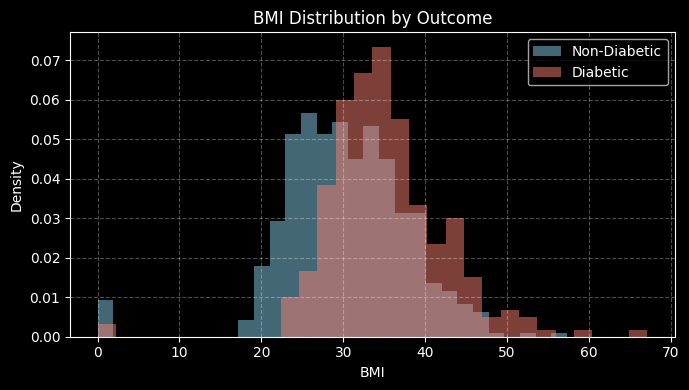

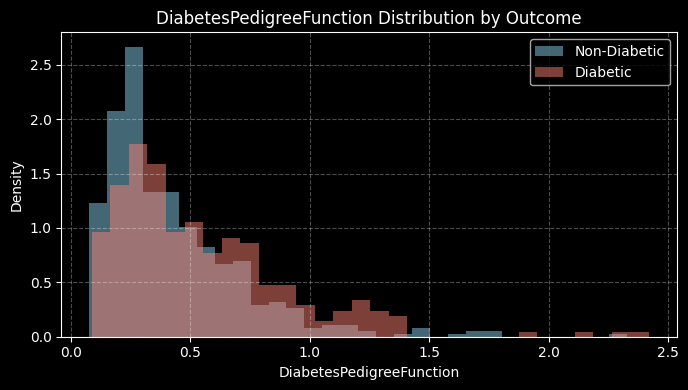

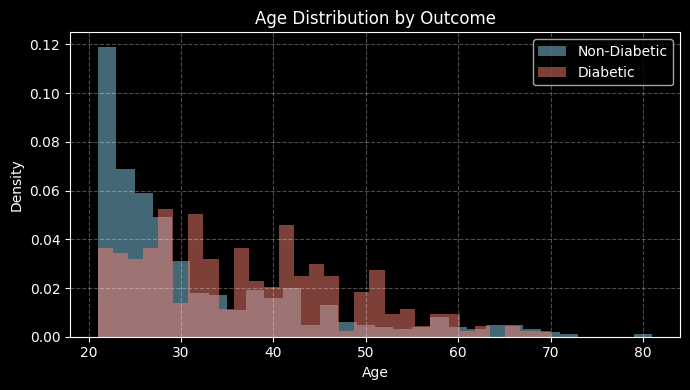

In [88]:
import matplotlib.pyplot as plt

features = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'
]

# Plot each feature
for feature in features:
    plt.figure(figsize=(7, 4))

    # Plot histogram for Outcome = 0
    plt.hist(
        df[df["Outcome"] == 0][feature],
        bins=30,
        alpha=0.5,
        label="Non-Diabetic",
        color="skyblue",
        density=True
    )

    # Plot histogram for Outcome = 1
    plt.hist(
        df[df["Outcome"] == 1][feature],
        bins=30,
        alpha=0.5,
        label="Diabetic",
        color="salmon",
        density=True
    )

    plt.title(f"{feature} Distribution by Outcome")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()